# Projeto Final para Ciência de Dados
## El nino
### Realizado por grupo 11
***Aprendizagem Não Supervisionada***

Catarina Brito nº98521 | Pedro Melo nº99160 | Tomás Aldeia nº 99780

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Ler dataset

In [2]:
clean = pd.read_csv('/Users/catarinabrito/Desktop/LCD/Segundo_Ano/Segundo_Semestre/Projeto/TRABALHO/Projeto_Grupo11/Base de Dados/Previous.csv')

## Standartização 

In [3]:
df = clean.drop(['obs','day','month','year','date','hemisferio','estacao','vento_lon','vento_lat'],1)
scale = StandardScaler().fit(df)
scale = scale.transform(df)

/var/folders/4f/7k81zvl55vn3c2nm1104whpc0000gn/T/ipykernel_12871/1702573017.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = clean.drop(['obs','day','month','year','date','hemisferio','estacao','vento_lon','vento_lat'],1)


## Redução Dimensional

### PCA - Principal Component Analysis

**Adequabilidade:** 

1. Correlação

<AxesSubplot:>

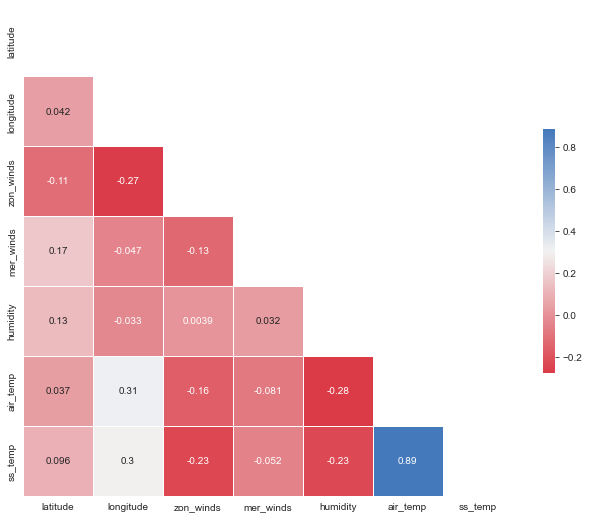

In [4]:
# Compute correlations
corr = df.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot = True)

Verifica-se baixa correlação entre as variáveis, exceto air_temp e ss_temp. 

Será que vale a pena usar PCA?

2. Bartlet Test

In [5]:
#!pip install factor_analyzer

In [6]:
# Bartlett's Spherical test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(chi_square_value, p_value)

346317.7029629194 0.0


3. KMO Test

In [7]:
# KMO test
# Check the correlation and partial correlation between variables , The value is 0-1 Between ;KOM The closer the statistics are 1, The stronger the correlation between variables , The weaker the partial correlation , The better the effect of factor analysis .
# Usually the value is from 0.6 Start factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_all)

[0.52050138 0.76753759 0.60375152 0.53591348 0.76059339 0.55011731
 0.55475893]


- **Matriz de Covariância**

In [8]:
covX = np.around(np.corrcoef(df.T),decimals=3)
covX

array([[ 1.   ,  0.042, -0.115,  0.168,  0.129,  0.037,  0.096],
       [ 0.042,  1.   , -0.27 , -0.047, -0.033,  0.313,  0.298],
       [-0.115, -0.27 ,  1.   , -0.129,  0.004, -0.162, -0.235],
       [ 0.168, -0.047, -0.129,  1.   ,  0.032, -0.081, -0.052],
       [ 0.129, -0.033,  0.004,  0.032,  1.   , -0.279, -0.23 ],
       [ 0.037,  0.313, -0.162, -0.081, -0.279,  1.   ,  0.885],
       [ 0.096,  0.298, -0.235, -0.052, -0.23 ,  0.885,  1.   ]])

### Aplicação PCA

#### Definição de 7 componentes

In [9]:
# Applying PCA function on training
#1º nº de componentes = nº de variáveis 
from sklearn.decomposition import PCA
 
pca = PCA(n_components=7)
 
Principal_components = pca.fit_transform(scale)

pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'])
print(pca_df)


            PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7
0       3.550627  0.257474 -0.813588  1.183074 -1.621896 -0.039240  0.073419
1       3.693492  0.036059 -1.044992  1.053137 -1.823511 -0.066699  0.084341
2       4.017793  0.085443 -0.572216  0.988868 -1.469197  0.497448  0.092849
3       3.672145  0.900009 -0.895883  1.894162 -1.839584 -0.451449  0.009456
4       3.337440  1.010935 -0.636672  1.888151 -1.553831 -0.408847 -0.211150
...          ...       ...       ...       ...       ...       ...       ...
177887  0.651061 -1.488962  1.051990  1.272384  0.873857  0.719058  0.255297
177888  0.747252 -1.219258  1.054889  1.131121  1.345173  0.815064  0.107230
177889  1.229184 -0.565313  0.440566  0.999959  1.870394  0.545702  0.277087
177890  0.920272 -0.465014  1.365018  1.892642  1.370935  0.698789  0.165827
177891  1.197173 -0.897173  0.968294  1.177666  1.567273  0.907641  0.197004

[177892 rows x 7 columns]


**- Nº de componentes**

**Critério de Kaiser** = 2 componentes

In [10]:
eigenvalues = pca.explained_variance_
eigenvalues

array([2.26999321, 1.32831176, 0.99129941, 0.91566955, 0.70826217,
       0.67788061, 0.10862265])

**Elbow plot** = 2 componentes

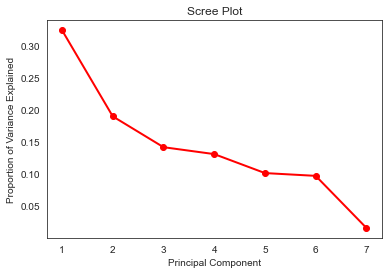

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

**Variância explicativas** = 3 componentes

In [12]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum) # Nota 2 PCA'S apenas explicam 51%, assim vamos definir 3

Proportion of Variance Explained :  [0.32428292 0.18975776 0.14161341 0.1308092  0.10117974 0.09683954
 0.01551743]
Cumulative Prop. Variance Explained:  [0.32428292 0.51404068 0.65565408 0.78646328 0.88764302 0.98448257
 1.        ]


**Conclusão**
- Definir 3 Componentes

#### Definição de 3 componentes

In [13]:
# Applying PCA function on training
#1º nº de componentes = nº de variáveis 
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3)
 
Principal_components = pca.fit_transform(scale)

pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3'])
print(pca_df)



            PC 1      PC 2      PC 3
0       3.550627  0.257474 -0.813588
1       3.693492  0.036059 -1.044992
2       4.017793  0.085443 -0.572216
3       3.672145  0.900009 -0.895883
4       3.337440  1.010935 -0.636672
...          ...       ...       ...
177887  0.651061 -1.488962  1.051990
177888  0.747252 -1.219258  1.054889
177889  1.229184 -0.565313  0.440566
177890  0.920272 -0.465014  1.365018
177891  1.197173 -0.897173  0.968294

[177892 rows x 3 columns]


## CLUSTERING

### K-MEANS

- Nº Clusters para K - means

In [14]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

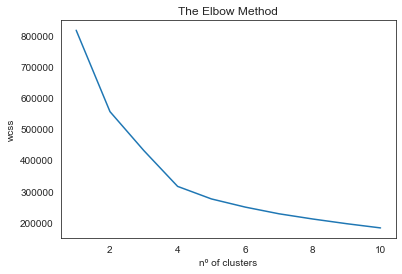

In [15]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('nº of clusters')
plt.ylabel('wcss')
plt.show() # 4 clusters

Elbow Method to determine the number of clusters to be formed:


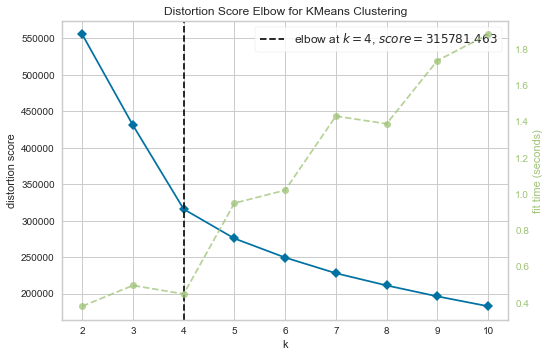

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

**Conclusão:**
- Definir 4 Clusters

### K= 4

In [46]:
kmeansmodel1 = KMeans(n_clusters= 4, init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 40, algorithm='elkan')
pred1 = kmeansmodel1.fit_predict(pca_df)
labels1 = kmeansmodel1.labels_
centroids1 = kmeansmodel1.cluster_centers_

In [47]:
pred1

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [48]:
clean['Cluster_Id'] = kmeansmodel1.labels_
clean.head()

,obs,year,month,day,date,latitude,longitude,zon_winds,mer_winds,humidity,air_temp,ss_temp,hemisferio,estacao,vento_lon,vento_lat,Cluster_Id
0,24,80,8,11,800811,0.0,-109.56,3.3,1.5,81.23777,21.48,21.81,Norte,Verão,Oeste,Norte,2
1,25,80,8,12,800812,0.0,-109.56,3.5,0.8,81.23777,21.27,21.58,Norte,Verão,Oeste,Norte,2
2,26,80,8,13,800813,0.0,-109.56,4.9,1.9,81.23777,21.11,21.32,Norte,Verão,Oeste,Norte,2
3,27,80,8,14,800814,0.0,-109.56,1.2,2.1,81.23777,20.95,21.19,Norte,Verão,Oeste,Norte,2
4,28,80,8,15,800815,0.0,-109.56,1.2,2.7,81.23777,21.76,21.47,Norte,Verão,Oeste,Norte,2


- Representação gráfica

In [49]:
x = pca_df["PC 1"]
y = pca_df["PC 2"]
z = pca_df["PC 3"]

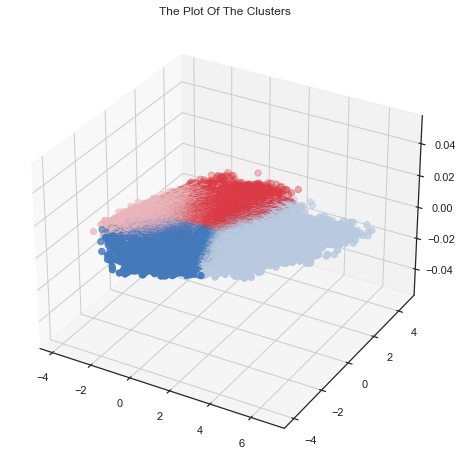

In [50]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x,y,s=40, c= clean["Cluster_Id"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

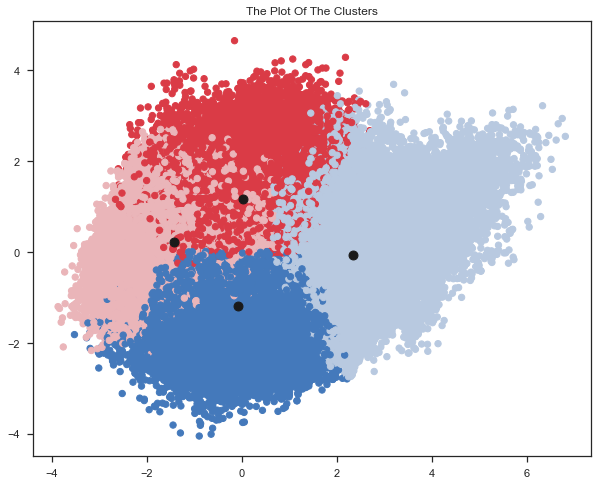

In [51]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x,y,s=40, c= clean["Cluster_Id"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.scatter(centroids1[:,0] , centroids1[:,1] , s = 80, color = 'k')
plt.show()

## Caracterização dos clusters

In [23]:
clean['Cluster_Id'].value_counts()

1    52322
0    50918
3    41837
2    32815
Name: Cluster_Id, dtype: int64

In [24]:
clean[clean["Cluster_Id"] == 0][["ss_temp", "longitude",'latitude','zon_winds','mer_winds','humidity']].median()

ss_temp       28.28
longitude   -154.97
latitude      -2.00
zon_winds      5.60
mer_winds      1.50
humidity      80.50
dtype: float64

In [25]:
clean[clean["Cluster_Id"] == 1][["ss_temp", "longitude",'latitude','zon_winds','mer_winds','humidity']].median()

ss_temp       29.33000
longitude    156.15000
latitude       0.03000
zon_winds      2.30000
mer_winds      1.50000
humidity      81.23777
dtype: float64

In [26]:
clean[clean["Cluster_Id"] == 2][["ss_temp", "longitude",'latitude','zon_winds','mer_winds','humidity']].median()

ss_temp       24.68000
longitude   -110.09000
latitude      -0.07000
zon_winds      5.10000
mer_winds      1.90000
humidity      81.23777
dtype: float64

In [27]:
clean[clean["Cluster_Id"] == 3][["ss_temp", "longitude",'latitude','zon_winds','mer_winds','humidity']].median()

ss_temp       28.01000
longitude   -132.48000
latitude       5.01000
zon_winds      3.40000
mer_winds      4.30000
humidity      81.23777
dtype: float64

## Gráficos 
- Cluster 1 - Oeste do Pacífico, valores extremos
- Cluster 2 - Este do Pacífico, valores elevados
- Cluster 3 - Este do Pacífico, valores elevados
- Cluster 4 - Este do Pacífico, valores mais baixos

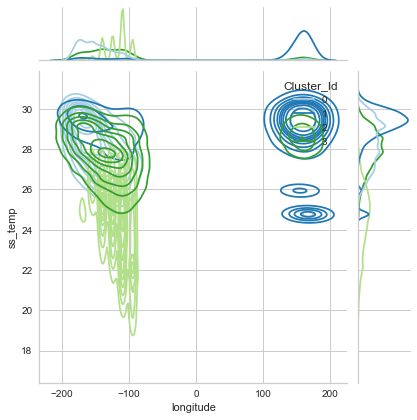

In [28]:
import seaborn as sns

g = sns.jointplot(
    data=clean,
    x="longitude", y="ss_temp", hue="Cluster_Id",
    kind="kde", palette="Paired"
)

- Cluster 1 - Valores extremos
- Cluster 2 - Norte do Pacífico, valores elevados
- Cluster 3 - Sul do Pacífico, valores elevados
- Cluster 4 - Sul do Pacífico, valores mais baixos

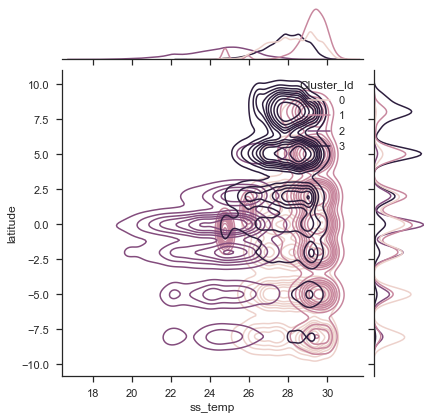

In [29]:
import seaborn as sns
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=clean,
    x="ss_temp", y="latitude", hue="Cluster_Id",
    kind="kde")

- Clusters consoante a estação do ano

In [30]:
clean[clean["Cluster_Id"] == 0][['hemisferio','estacao']].value_counts()

hemisferio  estacao  
Sul         Outono       10088
            Inverno       7939
            Verão         7859
            Primavera     7381
Norte       Primavera     4666
            Verão         4572
            Outono        4323
            Inverno       4090
dtype: int64

In [31]:
clean[clean["Cluster_Id"] == 1][['hemisferio','estacao']].value_counts()

hemisferio  estacao  
Norte       Primavera    9301
            Verão        8098
            Outono       7720
            Inverno      6659
Sul         Outono       5594
            Verão        5208
            Primavera    5104
            Inverno      4638
dtype: int64

In [32]:
clean[clean["Cluster_Id"] == 2][['hemisferio','estacao']].value_counts()

hemisferio  estacao  
Sul         Primavera    6416
            Inverno      5786
            Verão        5067
Norte       Outono       3804
            Inverno      3432
            Verão        3365
Sul         Outono       3181
Norte       Primavera    1764
dtype: int64

In [33]:
clean[clean["Cluster_Id"] == 3][['hemisferio','estacao']].value_counts()

hemisferio  estacao  
Norte       Inverno      10400
            Primavera     9482
            Outono        9293
            Verão         8374
Sul         Verão         1540
            Outono        1198
            Primavera      868
            Inverno        682
dtype: int64

- Clusters consoante a direção dos ventos

In [34]:
clean[clean["Cluster_Id"] == 0][['vento_lat','vento_lon']].value_counts()

vento_lat  vento_lon
Norte      Oeste        21847
Sul        Oeste        21173
Norte      Este          5962
Sul        Este          1936
dtype: int64

In [35]:
clean[clean["Cluster_Id"] == 1][['vento_lat','vento_lon']].value_counts()

vento_lat  vento_lon
Norte      Este         18402
Sul        Oeste        15075
Norte      Oeste        10806
Sul        Este          8039
dtype: int64

In [36]:
clean[clean["Cluster_Id"] == 2][['vento_lat','vento_lon']].value_counts()

vento_lat  vento_lon
Norte      Oeste        22966
Sul        Oeste         6054
Norte      Este          3710
Sul        Este            85
dtype: int64

In [37]:
clean[clean["Cluster_Id"] == 3][['vento_lat','vento_lon']].value_counts()

vento_lat  vento_lon
Sul        Oeste        15775
Norte      Oeste        13606
           Este         10732
Sul        Este          1724
dtype: int64